# LABORATORIO DE ANÁLISIS DE VENTAS



## ETL – Extracción, Transformación y Carga

In [38]:
import pandas as pd
import numpy as np

# Configuración estética
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

### 1. Extracción

In [39]:
# Ruta del archivo CSV (puedes subirlo a Colab o poner tu ruta local)
file_path = "transactions_100k.csv"

# Cargar el dataset en un DataFrame
df = pd.read_csv(file_path)

# Mostrar información general del dataset
print("Información inicial del dataset:")
print(df.info())

# Mostrar las primeras filas
print("\nPrimeras 5 filas del dataset:")
display(df.head())

Información inicial del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   transaction_id  100000 non-null  int64  
 1   date            100000 non-null  object 
 2   customer_id     100000 non-null  int64  
 3   product         100000 non-null  object 
 4   category        100000 non-null  object 
 5   quantity        100000 non-null  int64  
 6   unit_price      100000 non-null  float64
 7   total_amount    100000 non-null  float64
 8   payment_method  100000 non-null  object 
 9   region          100000 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 7.6+ MB
None

Primeras 5 filas del dataset:


,transaction_id,date,customer_id,product,category,quantity,unit_price,total_amount,payment_method,region
0,1,2024-04-12,1758,Coffee Beans 1kg,Food & Beverage,7,11.35,79.45,Bank Transfer,South
1,2,2025-03-11,15084,Smartphone,Electronics,6,578.39,3470.34,Credit Card,South
2,3,2024-09-27,12006,Bottled Water (6),Food & Beverage,2,4.84,9.68,Debit Card,Central
3,4,2024-04-16,17608,Dumbbell Set,Sports,7,60.29,422.03,Digital Wallet,North
4,5,2024-03-12,13512,First Aid Kit,Health,1,27.25,27.25,Bank Transfer,Central


### TRANSFORMACIÓN

In [34]:
# Verificar valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())

# Eliminar duplicados si existen
df.drop_duplicates(inplace=True)

# Convertir tipos de datos si es necesario
df['date'] = pd.to_datetime(df['date'])  # convertir fechas

# Crear nuevas variables derivadas
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Calcular precio promedio por categoría (indicador)
avg_price_category = df.groupby('category')['unit_price'].transform('mean')
df['price_vs_category_avg'] = df['unit_price'] / avg_price_category

# Crear variable categórica según el monto total
df['transaction_size'] = pd.cut(df['total_amount'],
                                bins=[0, 100, 500, 1000, 5000, np.inf],
                                labels=['Muy Baja', 'Baja', 'Media', 'Alta', 'Muy Alta'])

# Crear una columna boolean para identificar compras "premium"
df['is_premium'] = df['total_amount'] > df['total_amount'].quantile(0.9)

# Revisar los cambios
print("\nDespués de la transformación:")
print(df.info())

# Mostrar ejemplo de nuevas columnas
display(df[['date', 'category', 'unit_price', 'total_amount',
            'transaction_size', 'is_premium']].head())


Valores faltantes por columna:
transaction_id    0
date              0
customer_id       0
product           0
category          0
quantity          0
unit_price        0
total_amount      0
payment_method    0
region            0
dtype: int64

Después de la transformación:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   transaction_id         100000 non-null  int64         
 1   date                   100000 non-null  datetime64[ns]
 2   customer_id            100000 non-null  int64         
 3   product                100000 non-null  object        
 4   category               100000 non-null  object        
 5   quantity               100000 non-null  int64         
 6   unit_price             100000 non-null  float64       
 7   total_amount           100000 non-null  float64       
 8   payment_m

,date,category,unit_price,total_amount,transaction_size,is_premium
0,2024-04-12,Food & Beverage,11.35,79.45,Muy Baja,False
1,2025-03-11,Electronics,578.39,3470.34,Alta,True
2,2024-09-27,Food & Beverage,4.84,9.68,Muy Baja,False
3,2024-04-16,Sports,60.29,422.03,Baja,False
4,2024-03-12,Health,27.25,27.25,Muy Baja,False


### CARGA

In [35]:
# Guardar el DataFrame limpio y transformado en un nuevo archivo
cleaned_path = "transactions_cleaned.csv"
df.to_csv(cleaned_path, index=False)

print(f"\n ETL completado. Archivo limpio guardado como: {cleaned_path}")


 ETL completado. Archivo limpio guardado como: transactions_cleaned.csv


## EDA – Análisis Exploratorio de Datos


===== Análisis Exploratorio de Datos (EDA) =====

 Primeras filas del dataset:


,transaction_id,date,customer_id,product,category,quantity,unit_price,total_amount,payment_method,region
0,1,2024-04-12,1758,Coffee Beans 1kg,Food & Beverage,7,11.35,79.45,Bank Transfer,South
1,2,2025-03-11,15084,Smartphone,Electronics,6,578.39,3470.34,Credit Card,South
2,3,2024-09-27,12006,Bottled Water (6),Food & Beverage,2,4.84,9.68,Debit Card,Central
3,4,2024-04-16,17608,Dumbbell Set,Sports,7,60.29,422.03,Digital Wallet,North
4,5,2024-03-12,13512,First Aid Kit,Health,1,27.25,27.25,Bank Transfer,Central



 Dimensiones del dataset: 100000 filas x 10 columnas

 Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   transaction_id  100000 non-null  int64  
 1   date            100000 non-null  object 
 2   customer_id     100000 non-null  int64  
 3   product         100000 non-null  object 
 4   category        100000 non-null  object 
 5   quantity        100000 non-null  int64  
 6   unit_price      100000 non-null  float64
 7   total_amount    100000 non-null  float64
 8   payment_method  100000 non-null  object 
 9   region          100000 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 7.6+ MB
None

 Estadísticas descriptivas:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
transaction_id,100000.0,NaN,NaN,NaN,50000.5,28867.657797,1.0,25000.75,50000.5,75000.25,100000.0
date,100000,731,2024-08-12,174,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,100000.0,NaN,NaN,NaN,10006.4546,5772.148926,1.0,5007.0,10002.5,14991.25,20000.0
product,100000,28,Laptop,5594,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,100000,7,Electronics,21993,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quantity,100000.0,NaN,NaN,NaN,5.48327,2.874144,1.0,3.0,5.0,8.0,10.0
unit_price,100000.0,NaN,NaN,NaN,158.004056,254.485411,3.6,12.7875,48.18,156.5625,1099.91
total_amount,100000.0,NaN,NaN,NaN,868.389754,1642.199416,3.6,56.48,210.325,756.54,10996.1
payment_method,100000,5,Credit Card,44964,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,100000,5,North,25037,NaN,NaN,NaN,NaN,NaN,NaN,NaN



 Valores nulos por columna:


,0
transaction_id,0
date,0
customer_id,0
product,0
category,0
quantity,0
unit_price,0
total_amount,0
payment_method,0
region,0



🔁 Número de filas duplicadas: 0


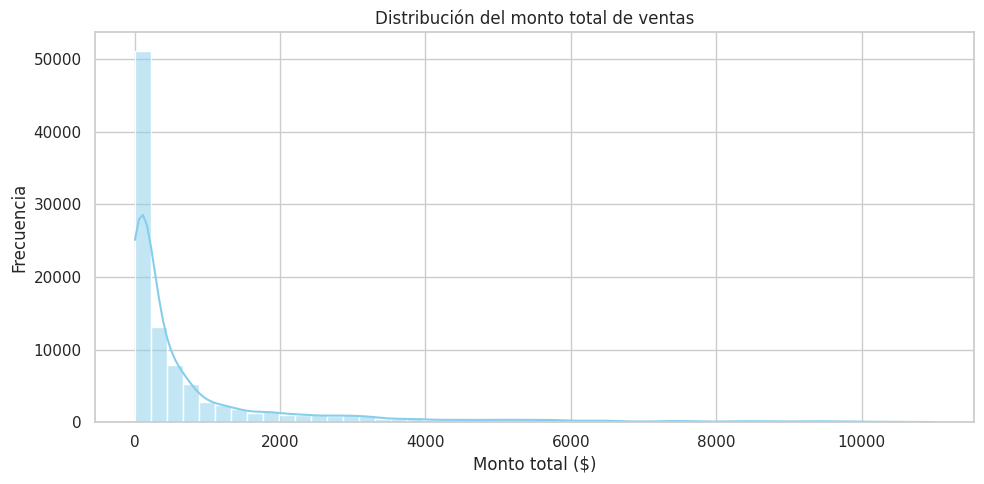

/tmp/ipython-input-2080065830.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_cat.index, y=sales_by_cat.values, palette="viridis")


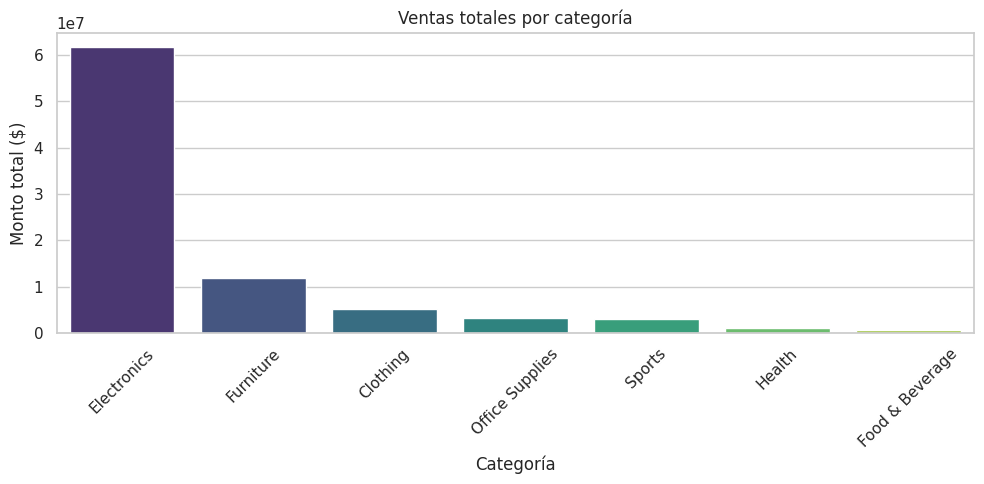


Top categorías por monto total:


,total_amount
category,
Electronics,61731977.60
Furniture,11948950.90
Clothing,5183905.51
Office Supplies,3291298.48
Sports,2887603.68


/tmp/ipython-input-2080065830.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="payment_method", data=df, order=df["payment_method"].value_counts().index, palette="Set2")


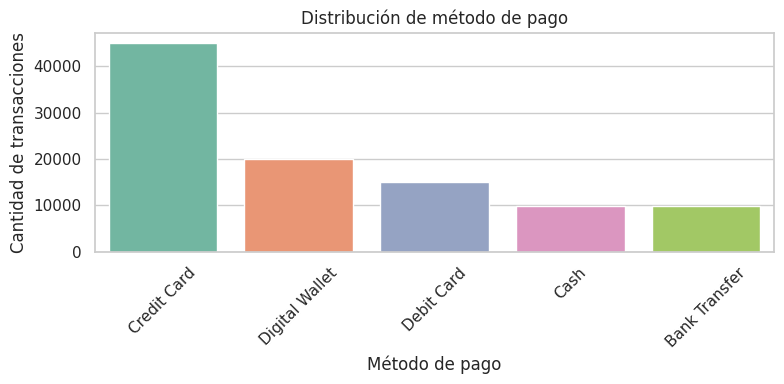


Recuento de transacciones por método de pago:


,count
payment_method,
Credit Card,44964
Digital Wallet,19995
Debit Card,15150
Cash,9989
Bank Transfer,9902


/tmp/ipython-input-2080065830.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_region.index, y=sales_by_region.values, palette="magma")


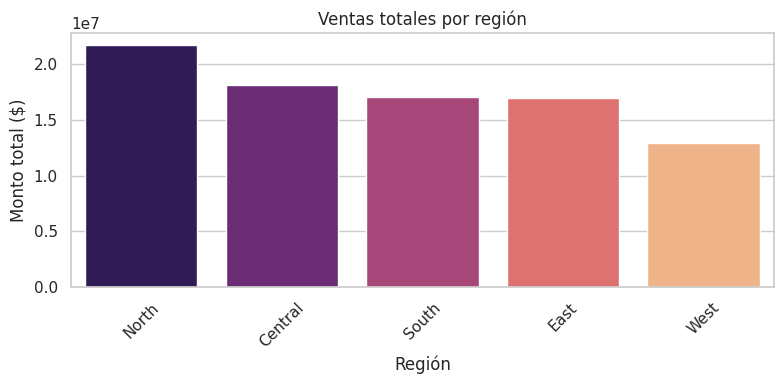


Ventas totales por región:


,total_amount
region,
North,21745909.60
Central,18156351.92
South,17064555.72
East,16954074.65
West,12918083.54



 Rango de fechas en el dataset:
Desde: 2024-01-01  Hasta: 2025-12-31


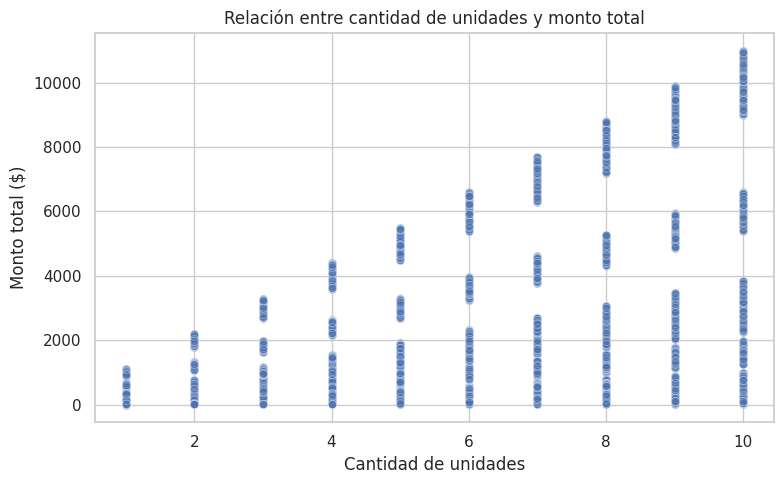


 Correlación (cantidad vs monto total): 0.28

 EDA completado. Revisá los gráficos y los hallazgos para la sección de preguntas de negocio.


In [49]:
print("\n===== Análisis Exploratorio de Datos (EDA) =====")

# 1. Vista general del DataFrame
print("\n Primeras filas del dataset:")
display(df.head())
print(f"\n Dimensiones del dataset: {df.shape[0]} filas x {df.shape[1]} columnas")

# 2. Información de columnas y tipos de datos
print("\n Información general del DataFrame:")
print(df.info())

# 3. Estadísticas descriptivas
print("\n Estadísticas descriptivas:")
display(df.describe(include='all').T)

# 4. Valores faltantes
print("\n Valores nulos por columna:")
display(df.isnull().sum())

# 5. Duplicados
num_duplicados = df.duplicated().sum()
print(f"\n🔁 Número de filas duplicadas: {num_duplicados}")

# 6. Distribuciones y gráficos iniciales
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

# a. Distribución del monto total de ventas
if "total_amount" in df.columns:
    plt.figure(figsize=(10,5))
    sns.histplot(df["total_amount"], bins=50, kde=True, color="skyblue")
    plt.title("Distribución del monto total de ventas")
    plt.xlabel("Monto total ($)")
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

# b. Ventas totales por categoría
if "category" in df.columns and "total_amount" in df.columns:
    sales_by_cat = df.groupby("category")["total_amount"].sum().sort_values(ascending=False)
    plt.figure(figsize=(10,5))
    sns.barplot(x=sales_by_cat.index, y=sales_by_cat.values, palette="viridis")
    plt.title("Ventas totales por categoría")
    plt.xlabel("Categoría")
    plt.ylabel("Monto total ($)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print("\nTop categorías por monto total:")
    display(sales_by_cat.head())

# c. Método de pago más utilizado
if "payment_method" in df.columns:
    plt.figure(figsize=(8,4))
    sns.countplot(x="payment_method", data=df, order=df["payment_method"].value_counts().index, palette="Set2")
    plt.title("Distribución de método de pago")
    plt.xlabel("Método de pago")
    plt.ylabel("Cantidad de transacciones")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print("\nRecuento de transacciones por método de pago:")
    display(df["payment_method"].value_counts())

# d. Ventas por región
if "region" in df.columns and "total_amount" in df.columns:
    sales_by_region = df.groupby("region")["total_amount"].sum().sort_values(ascending=False)
    plt.figure(figsize=(8,4))
    sns.barplot(x=sales_by_region.index, y=sales_by_region.values, palette="magma")
    plt.title("Ventas totales por región")
    plt.xlabel("Región")
    plt.ylabel("Monto total ($)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print("\nVentas totales por región:")
    display(sales_by_region)

# 7. Rango de fechas
if "date" in df.columns:
    print("\n Rango de fechas en el dataset:")
    print(f"Desde: {df['date'].min()}  Hasta: {df['date'].max()}")

# 8. Correlaciones simples (cantidad vs monto, etc.)
if "quantity" in df.columns and "total_amount" in df.columns:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x="quantity", y="total_amount", data=df, alpha=0.4)
    plt.title("Relación entre cantidad de unidades y monto total")
    plt.xlabel("Cantidad de unidades")
    plt.ylabel("Monto total ($)")
    plt.tight_layout()
    plt.show()
    corr = df[["quantity","total_amount"]].corr().iloc[0,1]
    print(f"\n Correlación (cantidad vs monto total): {corr:.2f}")

print("\n EDA completado. Revisá los gráficos y los hallazgos para la sección de preguntas de negocio.")


## PREGUNTAS DE NEGOCIO

### ¿Qué categoría genera más ingresos totales?


 Pregunta 1: ¿Qué categoría genera más ingresos totales?


,total_amount
category,
Electronics,61731977.60
Furniture,11948950.90
Clothing,5183905.51
Office Supplies,3291298.48
Sports,2887603.68
Health,1081892.00
Food & Beverage,713347.26


La categoría con mayores ingresos es 'Electronics' con un total de $61,731,977.60.


/tmp/ipython-input-2081337709.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette="coolwarm")


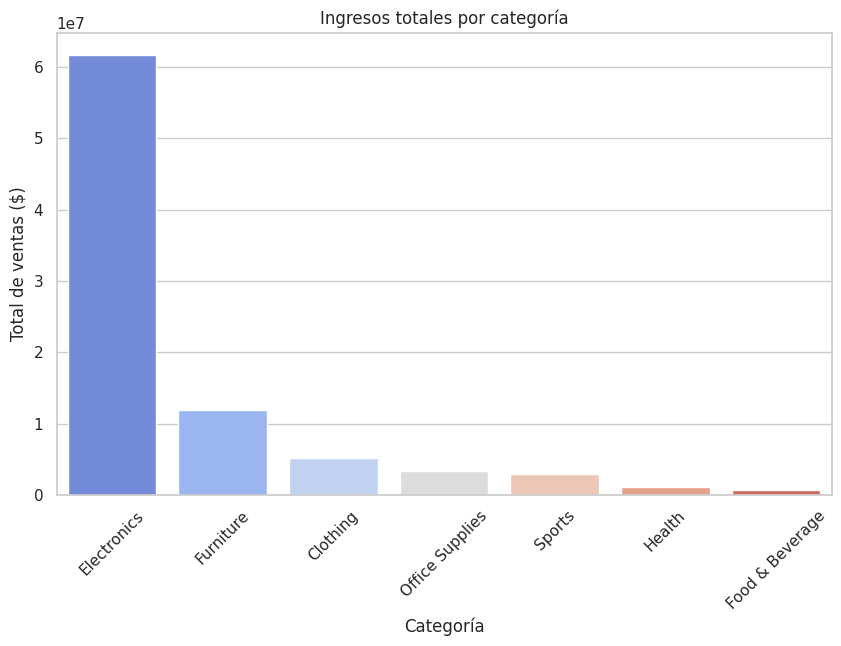

In [41]:
print("\n Pregunta 1: ¿Qué categoría genera más ingresos totales?")

category_sales = df.groupby("category")["total_amount"].sum().sort_values(ascending=False)
display(category_sales)

top_category = category_sales.idxmax()
top_value = category_sales.max()
print(f"La categoría con mayores ingresos es '{top_category}' con un total de ${top_value:,.2f}.")

sns.barplot(x=category_sales.index, y=category_sales.values, palette="coolwarm")
plt.title("Ingresos totales por categoría")
plt.ylabel("Total de ventas ($)")
plt.xlabel("Categoría")
plt.xticks(rotation=45)
plt.show()


### ¿Cómo evoluciona el volumen de ventas mensuales a lo largo del tiempo?


===== Pregunta 2: Evolución de ventas mensuales =====


,year_month,total_amount
19,2025-08,3780060.96
20,2025-09,3743418.88
21,2025-10,3695939.62
22,2025-11,3466480.48
23,2025-12,3602115.28


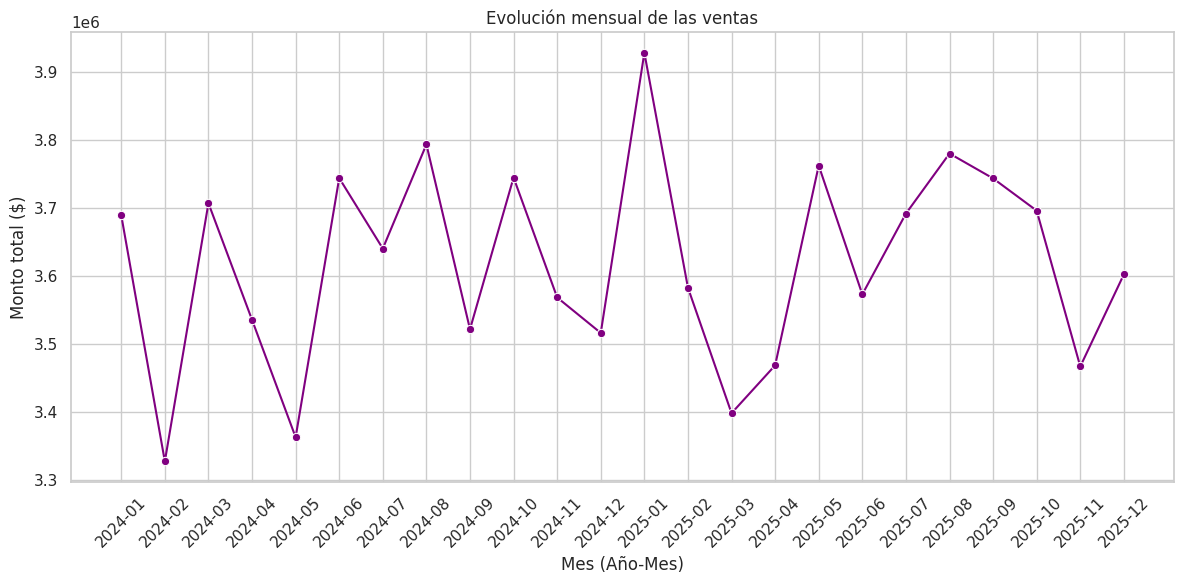

 La tendencia muestra la variación mensual en las ventas, útil para identificar estacionalidad o crecimiento.


In [56]:
print("\n===== Pregunta 2: Evolución de ventas mensuales =====")

# Crear columnas de año, mes y año-mes desde 'date'
df["date"] = pd.to_datetime(df["date"], errors="coerce")  # formato fecha
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["year_month"] = df["date"].dt.to_period("M").astype(str)

# Asegurar que 'total_amount' sea numérico
df["total_amount"] = pd.to_numeric(df["total_amount"], errors="coerce")

# Agrupar por año-mes y sumar las ventas
monthly_sales = (
    df.groupby("year_month", as_index=False)["total_amount"]
    .sum()
    .sort_values("year_month")
)

# Mostrar los últimos meses
from IPython.display import display
display(monthly_sales.tail())

# Graficar evolución mensual
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.lineplot(x="year_month", y="total_amount", data=monthly_sales, marker="o", color="purple")
plt.title("Evolución mensual de las ventas")
plt.xlabel("Mes (Año-Mes)")
plt.ylabel("Monto total ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(" La tendencia muestra la variación mensual en las ventas, útil para identificar estacionalidad o crecimiento.")


### ¿Qué región tiene mayor facturación promedio por cliente?


🔹 Pregunta 3: Facturación promedio por cliente según región


,total_amount
region,
Central,903.795705
West,868.734603
North,868.550929
South,854.210128
East,846.560875


La región con mayor facturación promedio por cliente es 'Central' con un promedio de $903.80.


/tmp/ipython-input-3423089518.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_revenue.index, y=region_revenue.values, palette="crest")


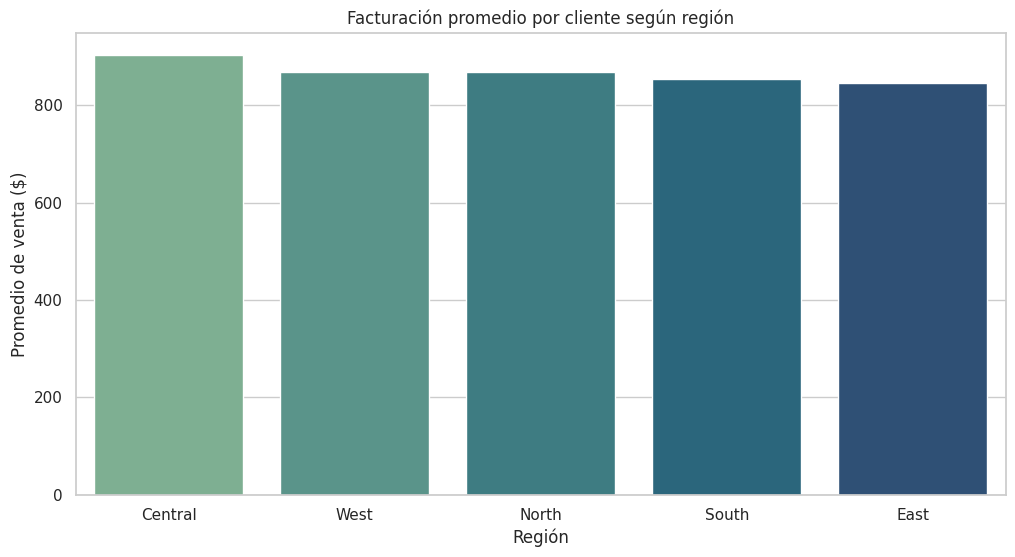

In [57]:
print("\n🔹 Pregunta 3: Facturación promedio por cliente según región")

region_revenue = df.groupby("region")["total_amount"].mean().sort_values(ascending=False)
display(region_revenue)

top_region = region_revenue.idxmax()
top_region_value = region_revenue.max()
print(f"La región con mayor facturación promedio por cliente es '{top_region}' con un promedio de ${top_region_value:,.2f}.")

sns.barplot(x=region_revenue.index, y=region_revenue.values, palette="crest")
plt.title("Facturación promedio por cliente según región")
plt.ylabel("Promedio de venta ($)")
plt.xlabel("Región")
plt.show()